In [287]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.pyplot import cm
from scipy.stats import pearsonr,spearmanr

from minepy import MINE
from minepy import pstats, cstats

%matplotlib inline


In [296]:
country_name = 'RUS'
# country_name = 'GBR'
# country_name = 'TUR'
# country_name = 'PAK'

event_file = '~/data/icews/events.sent.new.1991.201703.country/icews_events_{}.json'.format(country_name)
df = pd.read_json(event_file,lines=True)


In [304]:
# df.loc[df['City']=='Moscow']
df = df.loc[df['Event Date']>'2012-01-01']
df['Story ID'].value_counts()[:10]

36674930    56
26955553    32
32586132    30
40860288    30
36894190    30
40253120    28
33569541    27
32602351    27
34359535    26
18068648    26
Name: Story ID, dtype: int64

In [314]:
print(len(df))
df2 = df.drop_duplicates()
print(len(df2))

df.loc[df['Story ID']==36674930][['Event ID','Source Country','Country','City','Event Date','Sentence Number','Target Country']]


203855
203855


,Event ID,Source Country,Country,City,Event Date,Sentence Number,Target Country
830304,22565045,Russian Federation,Russian Federation,Moscow,2015-02-20,2,Germany
830305,22565046,France,Russian Federation,Moscow,2015-02-20,2,Germany
830306,22565047,Ukraine,Russian Federation,Moscow,2015-02-20,2,Germany
830307,22565048,Germany,Russian Federation,Moscow,2015-02-20,2,Germany
830308,22565049,Russian Federation,Russian Federation,Moscow,2015-02-20,2,Germany
830309,22565050,France,Russian Federation,Moscow,2015-02-20,2,Germany
830310,22565051,Ukraine,Russian Federation,Moscow,2015-02-20,2,Germany
830311,22565052,Germany,Russian Federation,Moscow,2015-02-20,2,Russian Federation
830312,22565053,France,Russian Federation,Moscow,2015-02-20,2,Russian Federation
830313,22565054,Ukraine,Russian Federation,Moscow,2015-02-20,2,Russian Federation


In [290]:
print(len(df))
df.sort_values('Event Date',inplace=True)
df

924326


,Province,Publisher,Source Country,District,City,Country,CAMEO Code,Target Name,Source Sectors,Event Date,...,Intensity,Story ID,Latitude,Event Text,Longitude,Target Country,Sentence Number,Event ID,Event Sentence,Headline
0,Moskva,The New York Times,United States,,Moscow,Russian Federation,51,Russia,"Center Right,Local,Ideological,Provincial,Gove...",1991-01-01,...,3.4,28527125,55.7522,Praise or endorse,37.6156,Russian Federation,1,5,WASHINGTON Dec. 31 -- In a friendly but circum...,Gorbachev Admits Errors but Predicts Gains; Bu...
1,Moskva,Reuters News,,,Moscow,Russian Federation,61,Russia,"Regional,International Government Organization...",1991-01-03,...,6.4,28529949,55.7522,Cooperate economically,37.6156,Russian Federation,4,164,The EC used to sell stocks from its notorious ...,
2,Moskva,Reuters News,Denmark,,Moscow,Russian Federation,10,Russia,"Executive,Government,Foreign Ministry",1991-01-03,...,0.0,28530084,55.7522,Make statement,37.6156,Russian Federation,2,174,He told Ritzau news agency it was extremely wo...,
3,Moskva,Reuters News,,,Moscow,Russian Federation,36,Luxembourg,"Regional,International Government Organization...",1991-01-03,...,4.0,28530084,55.7522,Express intent to meet or negotiate,37.6156,Luxembourg,3,175,The minister said he would raise the issue at ...,
4,Moskva,Reuters News,,,Moscow,Russian Federation,61,Russia,"Regional,International Government Organization...",1991-01-04,...,6.4,28530023,55.7522,Cooperate economically,37.6156,Russian Federation,4,320,,000 TONNES EC BUTTER.\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924323,,Interfax News Service,,,,Russian Federation,253,Russia,"Regional,International Government Organization...",2017-03-27,...,-0.3,43832121,55.7522,Appeal for release of persons or property,37.6156,Russian Federation,1,27405812,BRUSSELS March 27 (Interfax) - The European Un...,EU calls for release of opposition protesters ...
924269,,BBC Monitoring Newsfile,Russian Federation,,,Russian Federation,1041,Dmitry Anatolyevich Medvedev,"Social,General Population / Civilian / Social",2017-03-27,...,-5.0,43831605,55.7522,Demand change in leadership,37.6156,Russian Federation,2,27405365,Prime Minister Dmitry Medvedev has said he wen...,Russian PM went skiing during mass protests
924298,Moskva,Unknown,Russian Federation,,Moscow,Russian Federation,43,Angelino Alfano,,2017-03-27,...,2.8,43832353,55.7522,Host a visit,37.6156,Italy,2,27405561,MOSCOW (Sputnik) — Alfano is currently visitin...,Russia Remains Committed Partner of Italy Desp...
924296,Moskva,Unknown,Italy,,Moscow,Russian Federation,42,Sergey Viktorovich Lavrov,"Government,Foreign Ministry,Executive,Elite,Ju...",2017-03-27,...,1.9,43832353,55.7522,Make a visit,37.6156,Russian Federation,2,27405559,MOSCOW (Sputnik) — Alfano is currently visitin...,Russia Remains Committed Partner of Italy Desp...


In [291]:
df.columns
df['District'].value_counts()[:10]
df['City'].value_counts()[:10]

# df.loc[df['City']=='New Delhi']['Event Date']

Moscow            559281
                  146449
Moscow Kremlin     43302
St. Petersburg     26955
Groznyy            15387
Sochi              14498
Vladivostok         6512
Kaliningrad         5141
Makhachkala         4052
Yekaterinburg       3825
Name: City, dtype: int64

In [135]:
df.loc[df['Event Date']=='2017-03-26']['District'].value_counts()
# df['District'].value_counts()
# df['City'].value_counts()
# df[['District','City','Country']]
# df["loc"] = df["District"] +'-'+ df["City"]
# df['loc'].value_counts()[:10]

Greater London                    20
City and Borough of Birmingham    14
                                   2
Name: District, dtype: int64

In [213]:

def getRoot(x):
    x = int(x)
    if len(str(x)) == 4: # 1128
        return x // 100
    elif len(str(x)) == 3:
        if x // 10 < 20: # 190
            return x // 10
        else:
            return x // 100
    else:
        return x // 10

df = df.loc[df['CAMEO Code'] != '---'] 
df['RootEventCode'] = df['CAMEO Code'].apply(lambda x: getRoot(x) )
 


In [214]:
# df = df.loc[df['City'].isin(['New Delhi','Delhi'])]
# df = df.loc[df['City'].isin(['Moscow Kremlin','Moscow'])]
# df = df.loc[df['District'].isin(['Greater London'])]
# df = df.loc[df['City'].isin(['Ankara'])]
df = df.loc[df['City'].isin(['Islamabad'])]


len(df)

148786

In [215]:
start_year = 2010
start_month = 1
start_day = 1
end_year = 2017
end_month = 3
end_day = 26
# event_type_column = 'CAMEO Code'
event_type_column = 'RootEventCode'
delta_value = 1
if delta_value == 1:
    level = 'day'
elif delta_value == 7:
    level = 'week'
elif delta_value == 14:
    level = 'biweek'
elif delta_value == 30:
    level = 'month'
subevents = df[event_type_column].unique()
print(len(subevents),subevents)
subevent_count_dict = {}
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
n_days = 0
last_date = start_date - delta
while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date = start_date
    start_date += delta
    n_days += 1
print('n_days =',n_days)
# print('n_days =',len(df['event_date'].unique()))
for v in subevents:
    subevent_count_dict[v] = np.array([0 for i in range(n_days)])


20 [11  1  5 16  3 13 18 17 19 12  4 14  2  9  7 10  6  8 15 20]
n_days = 2642


In [216]:
# for loop day.... save count of each subevent.
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
day_i = 0
last_date = start_date - delta
# print('last_date',last_date,'start_date',start_date,'end_date',end_date)

while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date_str = last_date.strftime("%Y-%m-%d") #("%d %B %Y")
    date_str = start_date.strftime("%Y-%m-%d")
#     print('last_date_str',last_date_str,' --- date_str',date_str)
    df_day = df.loc[(df['Event Date'] > last_date_str) & (df['Event Date'] <= date_str)]
    if day_i%300==0:
        print('#',len(df_day),len(df))
#         print(df_day['sub_event_type'] )
    df_count = df_day[event_type_column].value_counts().rename_axis('unique_values').reset_index(name='counts')
#     print('df_count',df_count,df)
    for i,row in df_count.iterrows():
        subevent_count_dict[row['unique_values']][day_i] = row['counts']
    last_date = start_date
    start_date += delta
    day_i += 1
print('day_i =',day_i)

# 23 148786
# 13 148786
# 6 148786
# 39 148786
# 28 148786
# 8 148786
# 21 148786
# 6 148786
# 10 148786
day_i = 2642


2642 2642


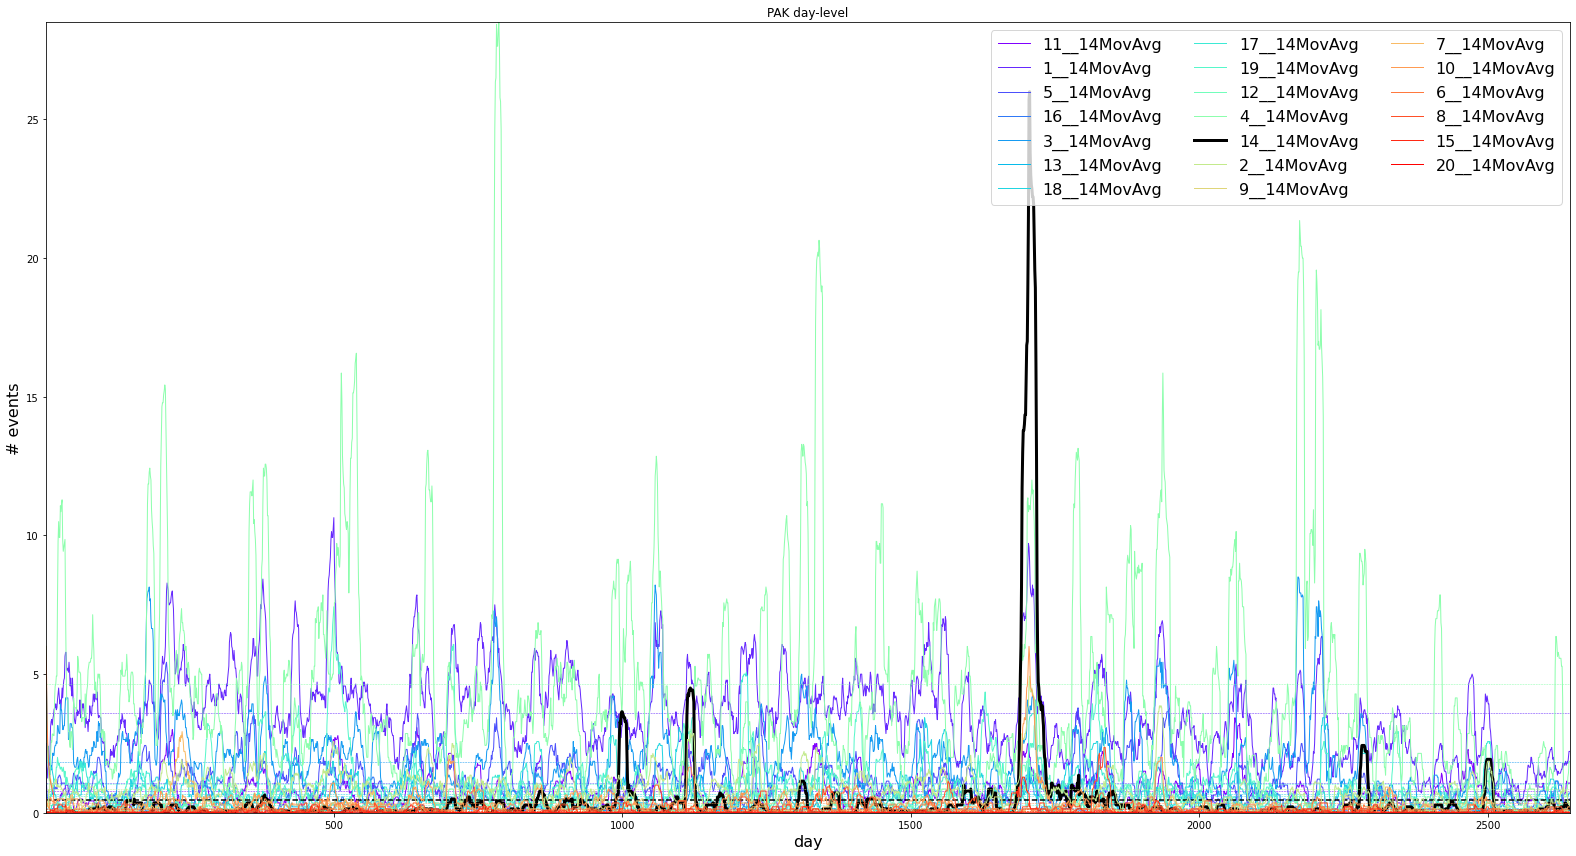

In [217]:
# Fixing random state for reproducibility


def movingaverage(a, n=3) :
    padding = []
    for i in range(n-1):
        padding.append(a[:i+1].mean())
    padding = np.array(padding)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.concatenate((padding, ret[n - 1:] / n),0)


t = np.arange(1, day_i+1, 1) 
print(len(t),len(subevent_count_dict[4]))
color=cm.rainbow(np.linspace(0,1,len(subevents)))

fig, axs = plt.subplots(1, 1,figsize=(22, 12))
event_set = [1,2,3,4,8,9,10,11,14]
event_set = np.arange(1,21,1)
# event_set = ['Violence against civilians', 'Protests', 'Riots']
# event_set = [  'Explosions/Remote violence']
for i in range(len(subevents)):
    if subevents[i] in event_set :
#         axs.plot(t, subevent_count_dict[subevents[i]], 's',label=subevents[i])
        ma_day = 14
        count_data = subevent_count_dict[subevents[i]][:]
        cur_t = t
        ma = movingaverage(count_data,ma_day)
        cur_label = str(subevents[i])+'__'+str(ma_day)+'MovAvg'
        if ma_day == 1:
            cur_label = str(subevents[i]) 
        if subevents[i] == 14:
#             axs.plot(t[:], ma, '-',label=cur_label,color=color[i],linewidth=4)
#             axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=4)
            axs.plot(cur_t, ma, '-',label=cur_label,color='black',linewidth=3)
            axs.axhline(y=count_data.mean(), color='black',  linestyle='--',linewidth=1.5)
        else:
            axs.plot(cur_t, ma, '-',label=cur_label,color=color[i],linewidth=1)
            axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=0.5)


axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
# axs.grid(True)
axs.legend(prop={'size': 16},ncol=3)
# cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
# axs[1].set_ylabel('coherence')
axs.margins(0.0)
axs.set_title('{} {}-level'.format(country_name,level))
# axs.set_title('Yemen week-level')

fig.tight_layout()
plt.show()
fig.savefig('time_series/ICEWS_{}_{}_city.pdf'.format(country_name,level), bbox_inches='tight')

 

In [17]:
list(range(1,21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [222]:
# get outcome variable 
protests_count = subevent_count_dict[14]
# print()
protests_count = np.where(protests_count < protests_count.mean(), 0, 1)
print('mean',protests_count.mean(),protests_count.shape)

# get treatment variables
def get_avg(x,day=8):
    r = []
    for i in range(0,len(x),day):
        avg = x[i:i+day].mean()
        r += [avg for i in range(day)]
    r = np.array(r)
#     print(r)
    return r
# protests_count[16:].shape
         
    
event_set_protest = [14]
bi_trend_dict = {}
ma_day = 10
for i in range(len(subevents)):
#     if subevents[i] in event_set_protest:
#         continue
    count_data = subevent_count_dict[subevents[i]]
    ma = movingaverage(count_data,ma_day)
    cur_trend = ma[ma_day*2-1:]
    prev_trend = ma[ma_day-1:ma_day-1+len(cur_trend)]
#     print(prev_trend,'prev')
#     print(cur_trend,'curr')
    bi_trend = np.where((cur_trend-prev_trend)>0,1,0)
    bi_trend_dict[subevents[i]] = bi_trend
#     break
print(bi_trend[:],bi_trend.shape)

mean 0.13663890991672975 (2642,)
[0 0 0 ... 0 0 0] (2623,)


In [223]:
# get association
data2 = protests_count[ma_day*2:]
print(data2.shape)

# x = np.linspace(0, 1, 1000)
# y = np.sin(10 * np.pi * x) + x

for i in range(len(subevents)):
#     if subevents[i] in event_set_protest:
#         continue
    data1 = bi_trend_dict[subevents[i]][:-1]
    corr, p = pearsonr(data1, data2)
    if not (p<0.05):
        continue
    print("{}  pearsonr  {:.2f} {:.5f} {}".format(subevents[i],corr*100,p,(p<0.05)))

    corr, p = spearmanr(data1, data2)
#     print(subevents[i],'spearmanr',corr*100,p,(p<0.05))
#     print("{}, spearmanr  {:.2f} {:.2f} {}".format(subevents[i],corr*100,p,(p<0.05)))

    mine = MINE(alpha=0.6, c=15, est="mic_e")
    mine.compute_score(data1, data2)
#     mic_p, tic_p = cstats(data1, data1, alpha=0.6, c=15, est="mic_e")
    print("{}   MINE {:.2f}".format(subevents[i],mine.mic()*100))

(2622,)
5  pearsonr  5.45 0.00525 True
5   MINE 0.21
16  pearsonr  4.15 0.03348 True
16   MINE 0.12
13  pearsonr  6.55 0.00079 True
13   MINE 0.30
18  pearsonr  4.39 0.02451 True
18   MINE 0.14
12  pearsonr  4.91 0.01184 True
12   MINE 0.17
14  pearsonr  7.79 0.00007 True
14   MINE 0.43
6  pearsonr  3.98 0.04167 True
6   MINE 0.11
15  pearsonr  5.03 0.00998 True
15   MINE 0.17


/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [285]:
# start = str(2021) + '-01-10'
# end = str(2021) + '-2-19'
# days=7
# lead_window=3
# lead_time = 1
# for date_i in pd.date_range(start, end, freq=str(lead_window)+'D'):
#     event_date = str(date_i.strftime("%Y-%m-%d")) 
#     date_j =date_i+pd.Timedelta(days=lead_window) # pd.offsets.Day(2)
#     event_date_end = str(date_j.strftime("%Y-%m-%d")) 
#     for before_i in range(days+lead_time-1, lead_time-1, -1): 
#         cur_date = str((date_i-pd.Timedelta(days=before_i)).strftime("%Y-%m-%d"))
#         print('cur_date',cur_date,before_i)
#     print(event_date,event_date_end)
a = [1,4,6,6,2,8]
a.index(6)
list(range(1,2+1))

[2]